# Inception Style Network

We built up our own inception-net and want to visualize and test the initialization of the layers to make sure that the network works.

We can then run training on it and determine its overall accuracies.

In [1]:
import sys
sys.path.append('../../dnn/')
from model.nets.ieegcnn import iEEGCNN
from model.train.traincnn import TrainCNN

import time
import os
import numpy as np
# np.random.seed(1234)

# import DNN frameworks
import tensorflow as tf
import keras

# utility for datasets and training
# from keras.utils.training_utils import multi_gpu_model
from keras.datasets import imdb
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'keras'

In [13]:
# image input settings
imsize = 32
n_colors = 4
num_classes = 2
DROPOUT = True

num_layers = 6
num_filters = 64
size_fc = 512

# initialize the ieegcnn
modelbuilder = iEEGCNN(imsize, n_colors, num_classes, DROPOUT)
inceptionmodel = modelbuilder._build_inception2dcnn(w_init=None, num_layers=num_layers, 
                                                    n_filters_first=num_filters, size_fc=size_fc)

In [14]:
print(inceptionmodel.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 32, 32, 4)    0                                            
__________________________________________________________________________________________________
conv2d_391 (Conv2D)             (None, 15, 15, 32)   1184        input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_392 (Conv2D)             (None, 13, 13, 32)   9248        conv2d_391[0][0]                 
__________________________________________________________________________________________________
conv2d_393 (Conv2D)             (None, 13, 13, 64)   18496       conv2d_392[0][0]                 
__________________________________________________________________________________________________
max_poolin

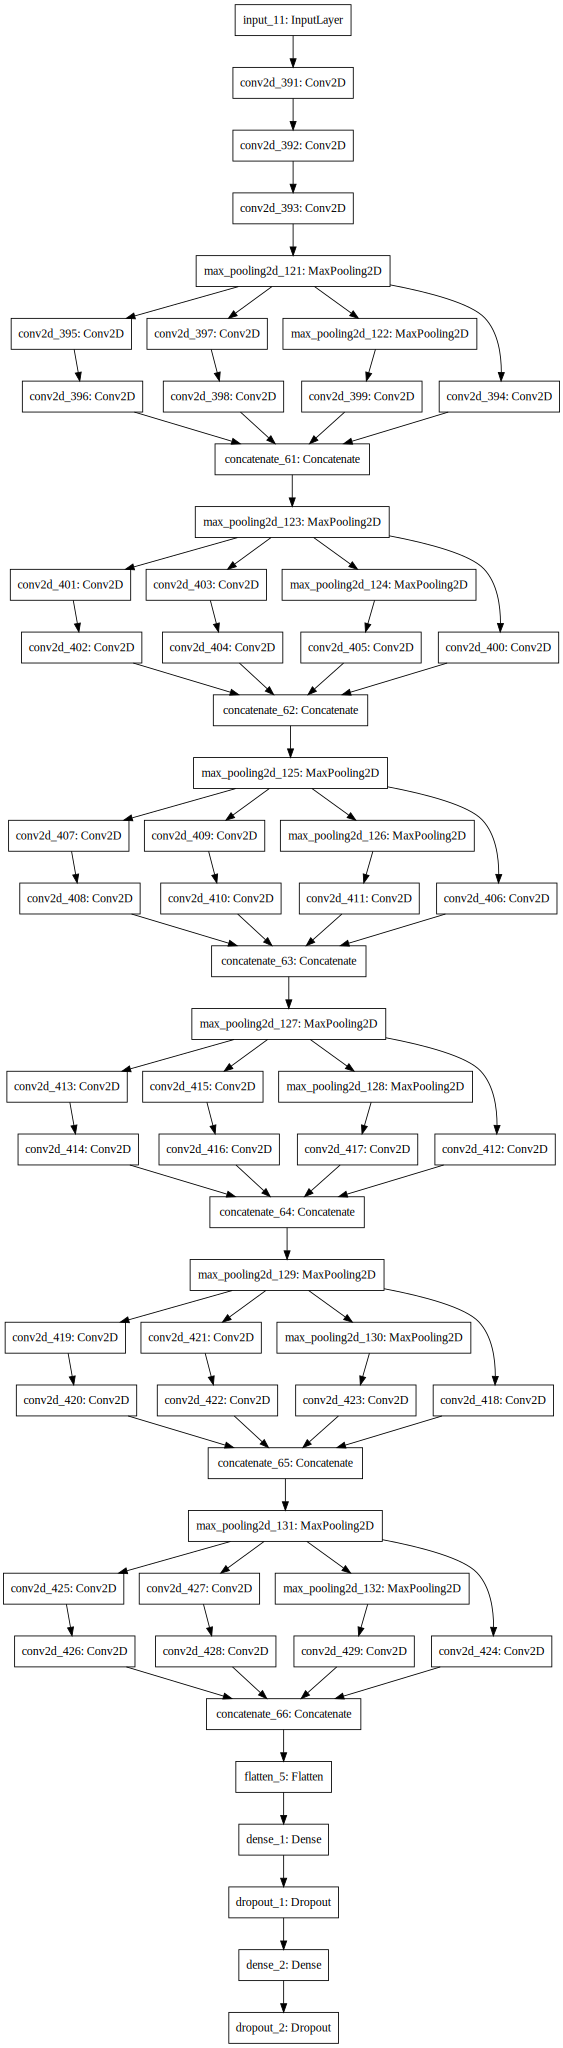

In [15]:
SVG(model_to_dot(inceptionmodel).create(prog='dot', format='svg'))